#### Erin Orbits, Hmk 3  

For this homework, your job is to assist in determining how to do end-of-day adjustments in the number of bikes at stations so that all stations will have enough bikes for the next day of operation (as estimated by the weekday average for the station for the year).  

Your assistance will help in constructing a plan for each day of the week that specifies how many bikes should be moved from each station and how many bikes must be delievered to each station.

Your assignment is to construct plots of the differences between 'from' and 'to' counts for each station by day of the week. Do this as a set of 7 subplots. You should use at least one function to construct your plots.


In [127]:
import pandas as pd
import numpy as np
import scipy
import seaborn
import matplotlib.pyplot as plt
# The following ensures that the plots are in the notebook
%matplotlib inline

**Imported the Data**

In [128]:
df_original = pd.read_csv("2015_trip_data.csv")

#### Created four new columns with the days of the week and dates extracted from the starttime and stoptime for each row.

Note: Not sure whether I should delete the rows with "Pronto shop" from the "original data frame," but given the goal and the fact that there were only a dozen or so mentions in the data, I decided to go ahead and delete the rows with trips to and from the "Pronto shop."

In [129]:
df_original = df_original[df_original.from_station_name != "Pronto shop"]
df_original = df_original[df_original.to_station_name != "Pronto shop"]

Add "day of week" and "date" columns to the original data frame to correspond with the "To" and "From" groups using the days of the week and the dates from the starttime and stoptime columns.

In [130]:
df_original["from_day_of_week"] = pd.DatetimeIndex(df_original['starttime']).dayofweek
df_original["to_day_of_week"] = pd.DatetimeIndex(df_original['stoptime']).dayofweek

In [131]:
df_original["from_date"] = pd.DatetimeIndex(df_original['starttime']).date
df_original["to_date"] = pd.DatetimeIndex(df_original['stoptime']).date

Check that the four new columns were added to the data frame.

In [132]:
df_original.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear', 'from_day_of_week',
       'to_day_of_week', 'from_date', 'to_date'],
      dtype='object')

#### Counted the number of bikes going to and from each station on each day of the week, and counted the number of days in order to take the average. 
With groupby you can group by multiple values and use aggregation functions like mean, median, sum, minimum, maximum, standard deviation, or count: <br>
>  `<data object>.groupby(<grouping values>).<aggregate>()` 

In [133]:
# Create a groupby variable that groups stations by day of week 
# and counts the days of the week
toStation_day_count = df_original.groupby(["to_station_id", "to_day_of_week"])["to_day_of_week"].count()
toStation_day_count.head(3)

to_station_id  to_day_of_week
BT-01          0                 791
               1                 675
               2                 696
Name: to_day_of_week, dtype: int64

In [134]:
fromStation_day_count = df_original.groupby(["from_station_id", "from_day_of_week"])["from_day_of_week"].count()
fromStation_day_count.head(3)

from_station_id  from_day_of_week
BT-01            0                   806
                 1                   724
                 2                   679
Name: from_day_of_week, dtype: int64

In [135]:
to_day_count = df_original.groupby(['to_day_of_week','to_date']).size().reset_index()
to_day_count = to_day_count.groupby(['to_day_of_week'])['to_date'].count()

In [136]:
from_day_count = df_original.groupby(['from_day_of_week','from_date']).size().reset_index()
from_day_count = from_day_count.groupby(['from_day_of_week'])['from_date'].count()

In [137]:
to_avg_bikes = toStation_day_count / to_day_count
from_avg_bikes = fromStation_day_count / from_day_count

In [138]:
deltaBikesPerStation = to_avg_bikes.unstack() - from_avg_bikes.unstack()
deltaBikesPerStation.head(4)

to_day_of_week,0,1,2,3,4,5,6
to_station_id,,,,,,,
BT-01,-0.283019,-0.942308,0.326923,-0.192308,-1.307692,-0.134615,0.903846
BT-03,-0.811321,-1.557692,-1.826923,-3.019231,-3.576923,-3.230769,-1.596154
BT-04,-1.113208,-1.134615,-0.846154,-1.596154,-1.288462,-0.384615,-0.634615
BT-05,0.132075,0.173077,0.519231,1.038462,-0.346154,-0.019231,0.230769


**Plotted the average difference bike counts per station per day of the week**

In [139]:
def plot_bar1(df, column, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param str column: name of the column to plot
    :param dict opts: key is plot attribute
    """
    n_groups = len(df.index)
    index = np.arange(n_groups)  # The "raw" x-axis of the bar plot
    rects1 = plt.bar(index, df[column])
    plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=None, hspace=0.4)
    if 'xlabel' in opts:
      plt.xlabel(opts['xlabel'])
    if 'ylabel' in opts:
      plt.ylabel(opts['ylabel'])
    if ('xticks' and 'xticks') in opts:
      plt.xticks(index, df.index)  # Convert "raw" x-axis into labels
      _, labels = plt.xticks()  # Get the new labels of the plot
      plt.setp(labels, rotation=90)  # Rotate labels to make them readable
    else:
      labels = ['' for x in df.index]
      plt.xticks(index, labels)   
    if 'ylim' in opts:
      plt.ylim(opts['ylim'])
    if 'title' in opts:
      plt.title(opts['title'])
        

In [140]:
def plotNbar(df, columns, opts):
    """
    Does a bar plot for a single column.
    :param pd.DataFrame df:
    :param list-of-str columns: names of the column to plot
    :param dict opts: key is plot attribute
    """
    num_columns = len(columns)
    days = ["Monday", "Tuesday", "Wednesday", 
            "Thursday", "Friday", "Saturday", "Sunday"]
    opts['title'] = days
    local_opts = dict(opts)  # Make a deep copy of the object
    local_opts['title'] = days
    idx = 0
    for column in columns:
        idx += 1
        local_opts['xticks'] = False
        local_opts['xlabel'] = ''
        local_opts['title'] = opts['title'][column]
        if idx == num_columns:
          local_opts['xticks'] = True
          local_opts['xlabel'] = opts['xlabel']
        plt.subplot(num_columns, 1, idx)
        # calls plot_bar1 to plot each column
        plot_bar1(df, column, local_opts)


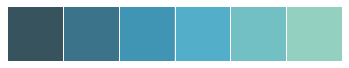

In [147]:
seaborn.axes_style()
current_palette = seaborn.color_palette()
seaborn.palplot(seaborn.color_palette("GnBu_d"))

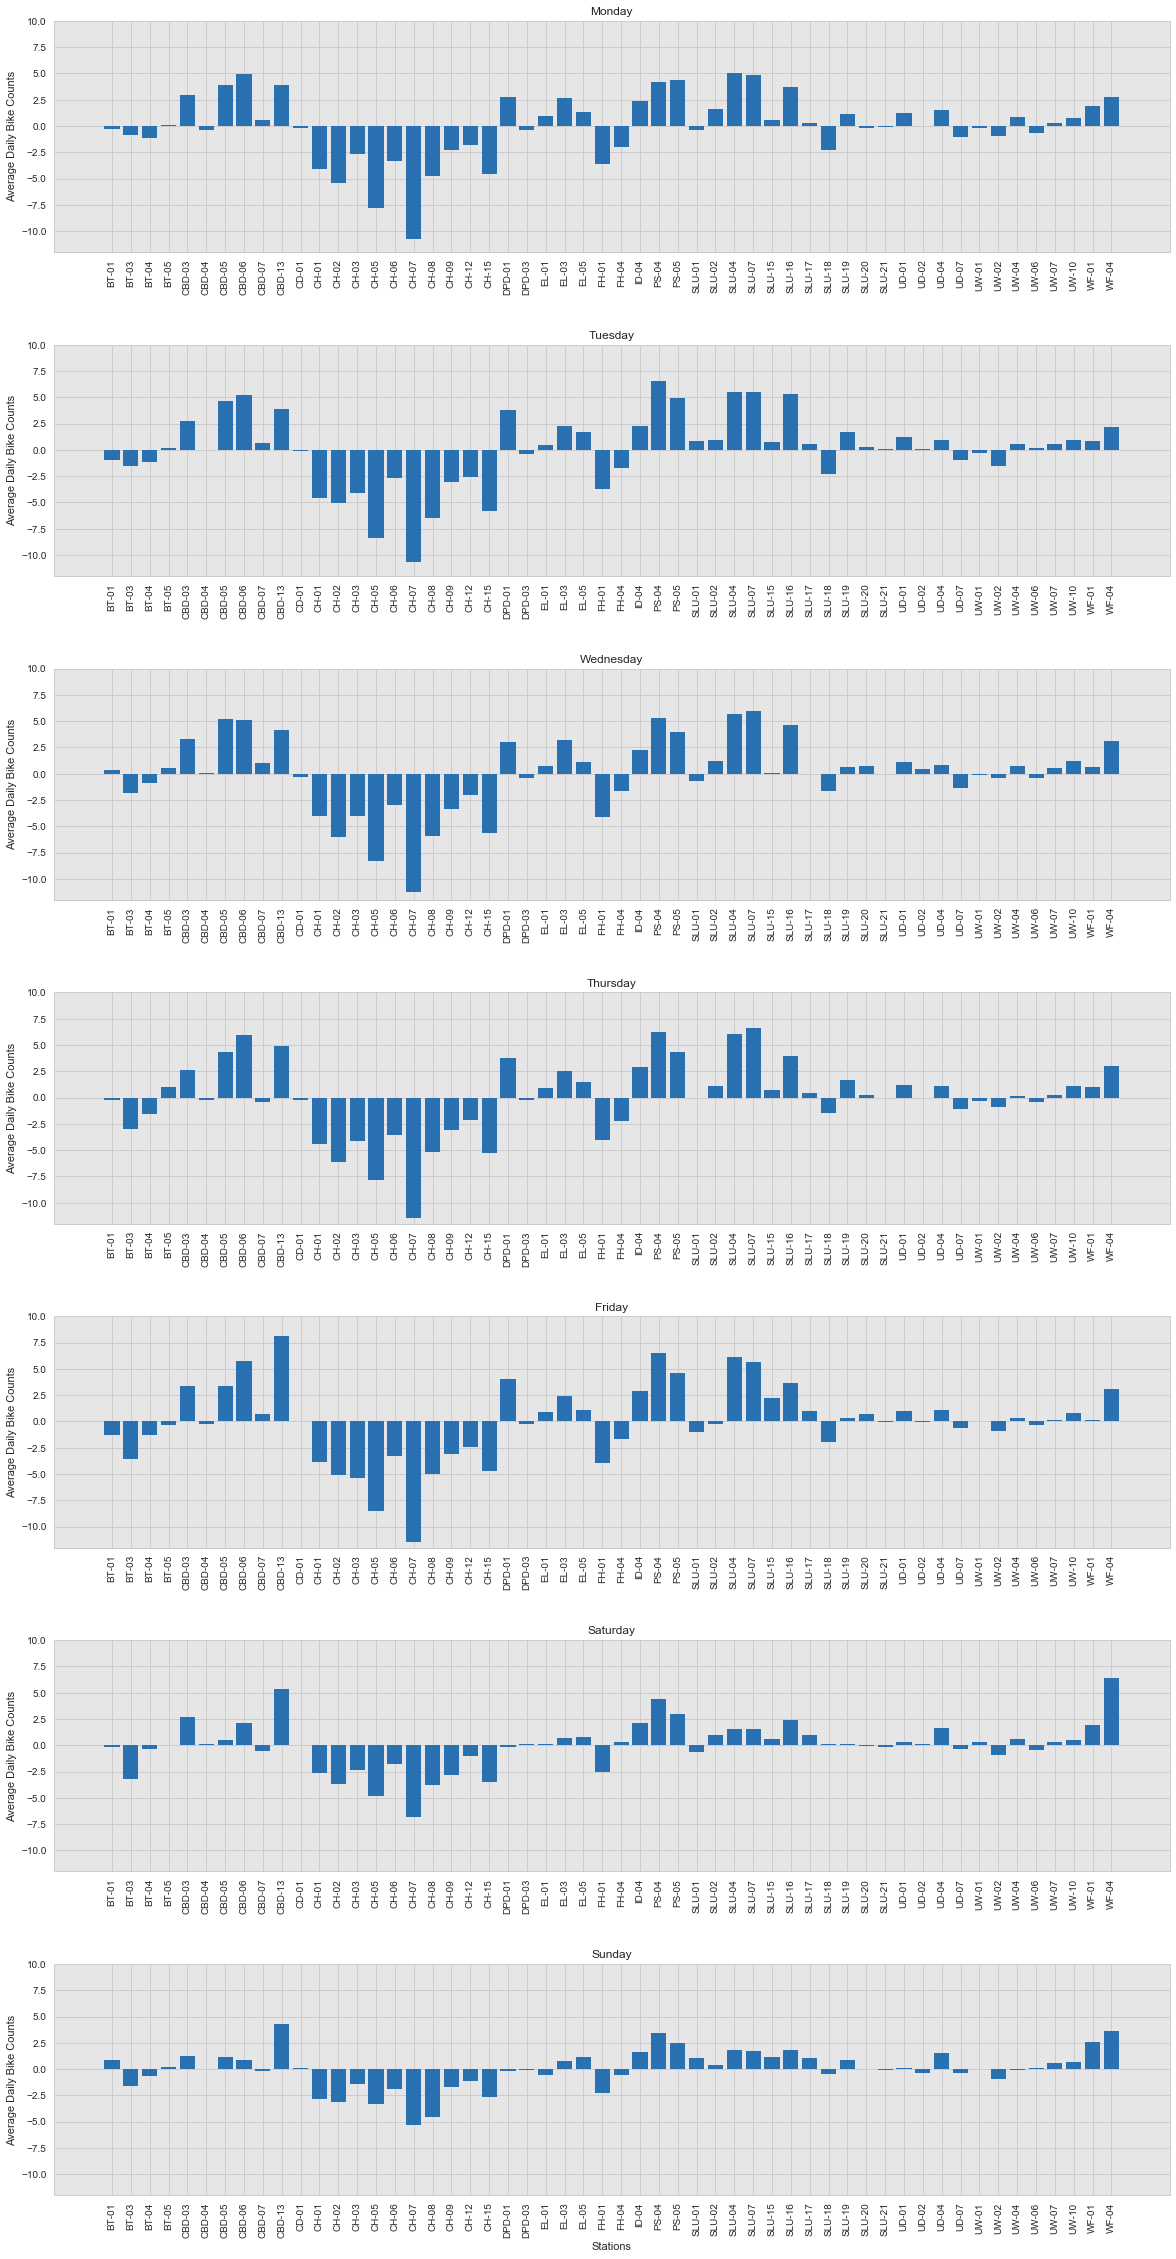

In [155]:
with seaborn.color_palette("RdBu_r", 7):
    seaborn.set_style("whitegrid", {"axes.facecolor": ".9"})
    fig = plt.figure(figsize=(20, 40))  # Controls global properties of the bar plot
    opts = {'xlabel': 'Stations', 
            'ylabel': 'Average Daily Bike Counts', 'ylim': [-12, 10]}
    plotNbar(deltaBikesPerStation, [0, 1, 2, 3, 4, 5, 6], opts)
